In [1]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import h5py as h5py
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [2]:
# hdf5 = '/notebooks/resources/3B-MO.MS.MRG.3IMERG.20150801-S000000-E235959.08.V03D.HDF5'
# hdf5 = '/notebooks/resources/3B-MO.MS.MRG.3IMERG.20150801-S000000-E235959.08.V06A.HDF5'
hdf5 = '/notebooks/resources/3B-MO.MS.MRG.3IMERG.20190101-S000000-E235959.01.V06A.HDF5'
dataset = h5py.File(hdf5,'r') # Change this to the proper path

In [3]:
precip = dataset['Grid/precipitation'][:]

precip = np.transpose(precip[0])

 

theLats= dataset['Grid/lat'][:]

theLons = dataset['Grid/lon'][:]

<IPython.core.display.Javascript object>


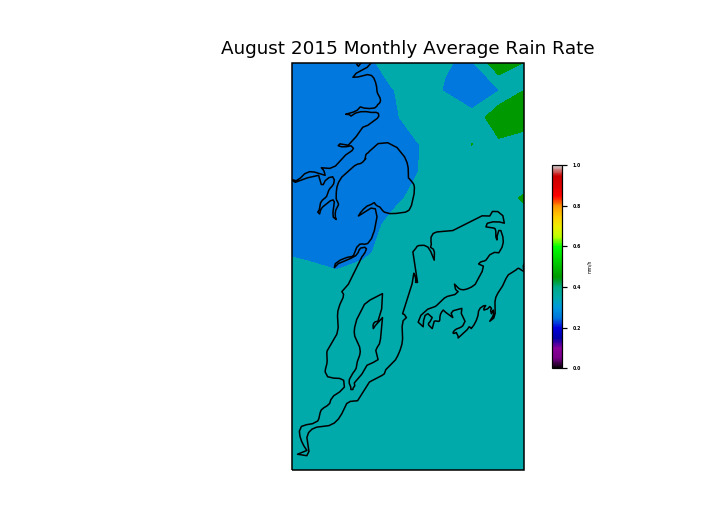

In [4]:
# Plot the figure, define the geographic bounds
fig = plt.figure(dpi=110)
# fig = plt.figure(figsize=(5,3))

latcorners = ([-60,60])

loncorners = ([-180,180])

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines()
# ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES.with_scale('10m'))

In [6]:
# Draw filled contours.

clevs = np.arange(0,1.26,0.125)

In [7]:
# Define the latitude and longitude data

x, y = np.float32(np.meshgrid(theLons, theLats))

In [8]:
# Mask the values less than 0 because there is no data to plot.

masked_array = np.ma.masked_where(precip < 0,precip)

In [9]:
cmap = 'nipy_spectral'

In [10]:
# Plot the data

cs = ax.contourf(x,y,precip,clevs,transform=ccrs.PlateCarree(),cmap=cmap)

In [11]:
# Set the title and fonts

plt.title('August 2015 Monthly Average Rain Rate')

font = {'weight' : 'bold', 'size' : 3}

plt.rc('font', **font)

plt.show()

In [12]:
sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(0,1))
sm._A = []
plt.colorbar(sm, ax=ax, label='mm/h', shrink=0.5)

In [13]:
# ax.set_extent([-180, 180, -90, 90])

In [14]:
# fname = r'./layers/POLYGON.shp'

# # ax = plt.axes(projection=ccrs.Robinson())
# shape_feature = ShapelyFeature(Reader(fname).geometries(),
#                                 ccrs.PlateCarree(), edgecolor='black')
# ax.add_feature(shape_feature)